In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from collections import Counter
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


def categorical_to_numpy(labels_in):
  labels = []
  for label in labels_in:
    if label == 'dog':
      labels.append(np.array([1, 0]))
    else:
      labels.append(np.array([0, 1]))
  return np.array(labels)

def one_hot_encoding(input):
  output = np.array(input)
  output = np.zeros((input.size, input.max()+1))
  output[np.arange(input.size),input] = 1

  return output


def load_data():
  # Run this cell to download our data into a file called 'cifar_data'
  !wget -O cifar_data https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads

  # now load the data from our cloud computer
  import pickle
  data_dict = pickle.load(open( "cifar_data", "rb" ));

  data   = data_dict['data']
  labels = data_dict['labels']

  return data, labels

def plot_one_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  import matplotlib.pyplot as plt
  my_img   = data[img_idx, :].squeeze().reshape([32,32,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  fig, ax = plt.subplots(1,1)

  img = ax.imshow(my_img.astype('uint8'), extent=[-1,1,-1,1])

  x_label_list = [0, 8, 16, 24, 32]
  y_label_list = [0, 8, 16, 24, 32]

  ax.set_xticks([-1, -0.5, 0, 0.5, 1])
  ax.set_yticks([-1, -0.5, 0, 0.5, 1])

  ax.set_xticklabels(x_label_list)
  ax.set_yticklabels(y_label_list)

  fig.show(img)

def CNNClassifier(num_epochs=30, layers=4, dropout=0.5):
  def create_model():
    model = Sequential()
    model.add(Reshape((32, 32, 3)))

    for i in range(layers):
      model.add(Conv2D(32, (3, 3), padding='same'))
      model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)

def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()

In [26]:
# load our data
data, labels = load_data()

--2023-06-21 22:02:25--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3689015 (3.5M) [application/octet-stream]
Saving to: ‘cifar_data’

cifar_data          100%[===================>]   3.52M  3.01MB/s    in 1.2s    

2023-06-21 22:02:26 (3.01 MB/s) - ‘cifar_data’ saved [3689015/3689015]



label: dog


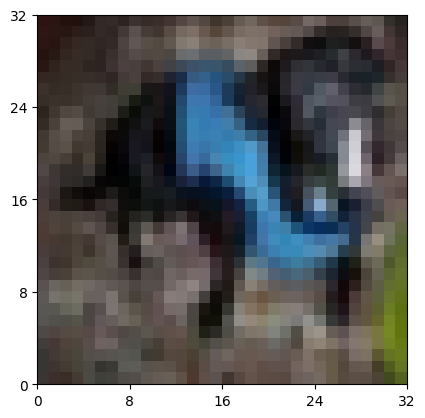

In [27]:
plot_one_image(data, labels, 0) #change this number

label: road


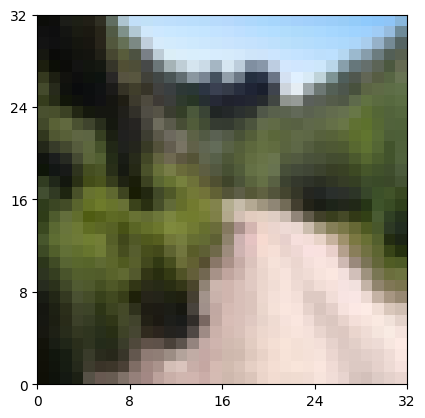

In [28]:
plot_one_image(data, labels, 700) #change this number

In [29]:
print (len(data))
print(Counter(labels))

1200
Counter({'dog': 600, 'road': 600})


label: dog
label: dog
label: dog
label: dog
label: dog
label: road
label: road
label: road
label: road
label: road


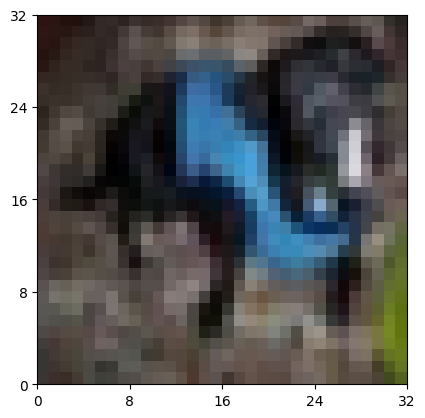

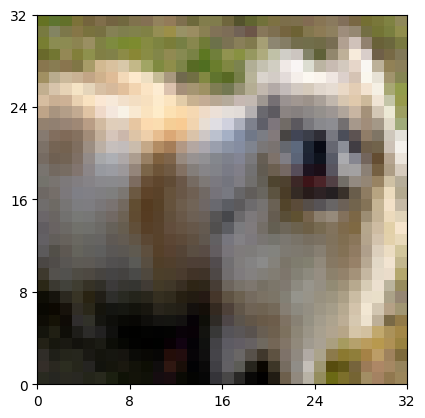

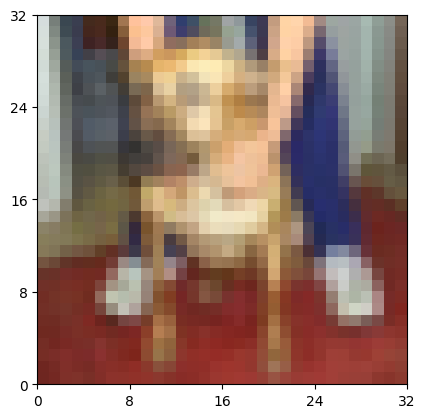

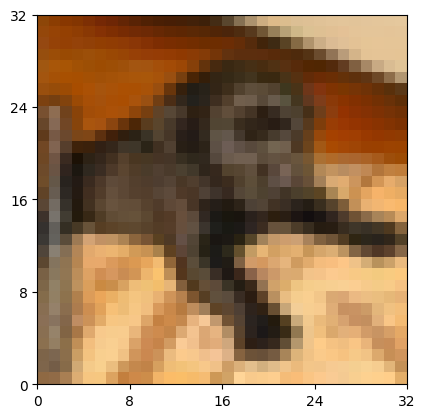

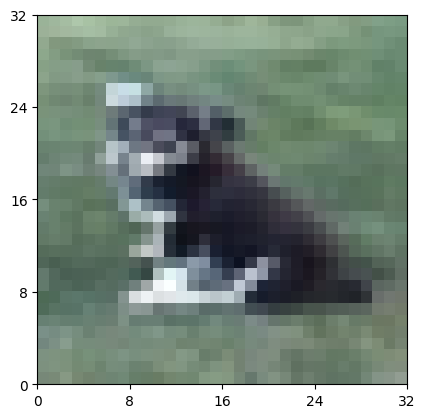

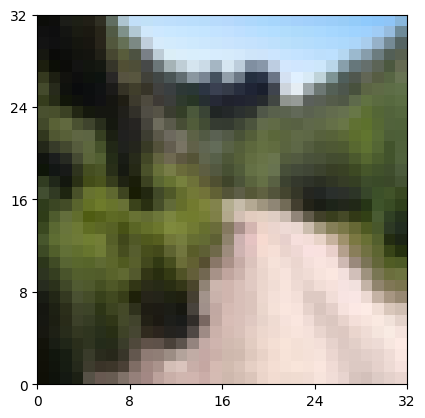

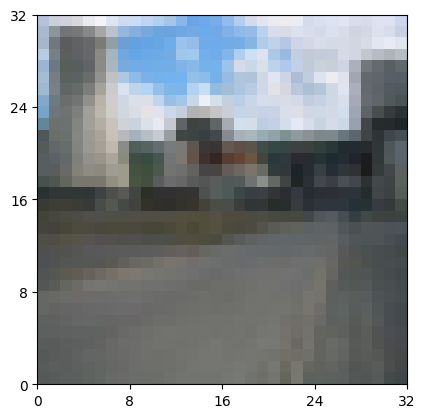

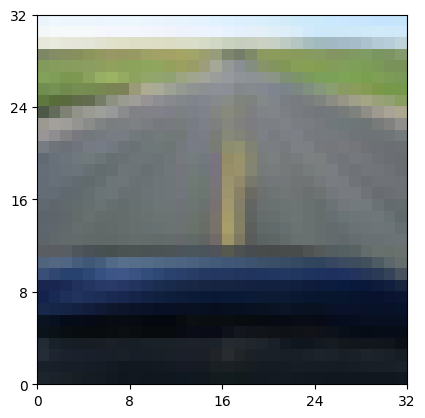

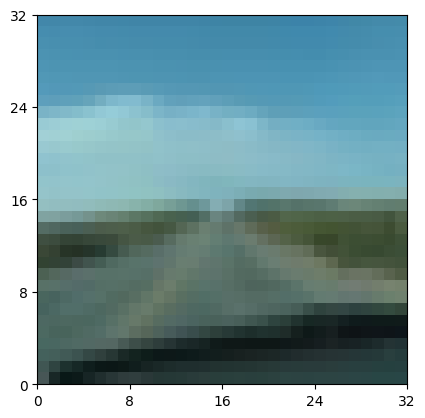

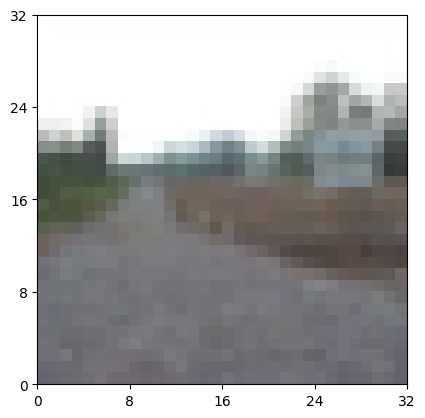

In [30]:
for i in range(0, 5):
  plot_one_image(data, labels, i)

for i in range(700, 705):
  plot_one_image(data, labels, i)

In [31]:
print('One image looks like: ')
print(data[0])
print("Length of list: ", len(data[0]))

One image looks like: 
[45 20 19 ... 83 99 31]
Length of list:  3072


In [32]:
print ('Data shape:', data.shape)
print ('Data:', data)

Data shape: (1200, 3072)
Data: [[ 45  20  19 ...  83  99  31]
 [101 114  35 ... 155 134  91]
 [213 221 221 ... 139  58  47]
 ...
 [126 174 202 ... 124 128 129]
 [191 232 240 ...  74  93  81]
 [237 248 254 ...  45  56  10]]


In [33]:
# Preparing data and create training and test inputs and labels
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.2, random_state=1)

# Initializing our model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Training our model with its training input data and labels
knn_model.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = knn_model.predict(X_test)

# Print the score on the testing data
print("KNN Testing Set Accuracy:")
print(accuracy_score(y_test, predictions)*100)

KNN Testing Set Accuracy:
80.0


label: road
prediction: road


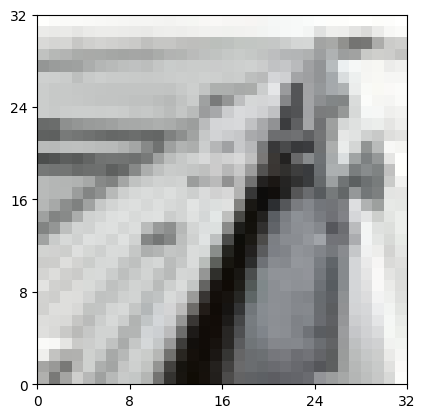

In [34]:
# Specify which image you want to show
image_id = 100 #Change this!

# Visualize the image
plot_one_image(X_test, y_test, image_id)

# Use the model to predict what this might be and print it
print('prediction:', knn_model.predict([X_test[image_id]])[0])

In [35]:
for i in [1, 3, 5, 10, 20, 30]:
  # Defining our classifier
  knn_model = KNeighborsClassifier(n_neighbors=i)

  # Training our model with its training input data and labels
  knn_model.fit(X_train, y_train)

  # predictions for test
  predictions = knn_model.predict(X_test)

  # Print the score on the testing data
  print("KNN Testing Set Accuracy for %d neighbors:"%i)
  print(accuracy_score(y_test, predictions)*100)
  ### END CODE

KNN Testing Set Accuracy for 1 neighbors:
80.0
KNN Testing Set Accuracy for 3 neighbors:
80.0
KNN Testing Set Accuracy for 5 neighbors:
79.16666666666666
KNN Testing Set Accuracy for 10 neighbors:
82.91666666666667
KNN Testing Set Accuracy for 20 neighbors:
82.5
KNN Testing Set Accuracy for 30 neighbors:
81.66666666666667


TRUE POSITIVES
label: dog
label: dog
label: dog
label: dog
FALSE POSITIVES
label: road
TRUE NEGATIVES
label: road
label: road
label: road
label: road
FALSE NEGATIVES
label: dog
label: dog
label: dog
label: dog


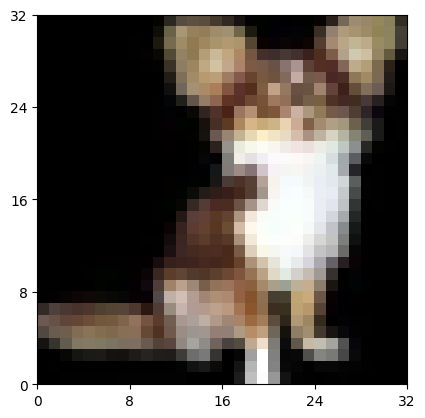

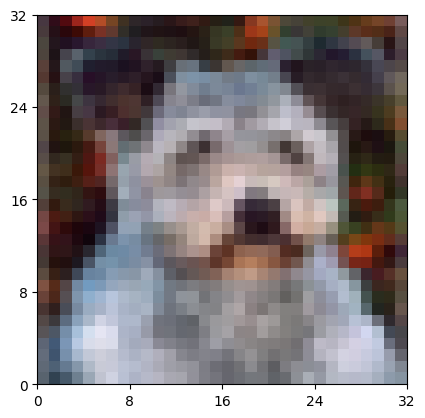

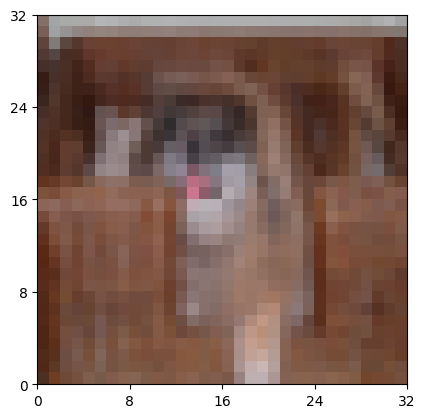

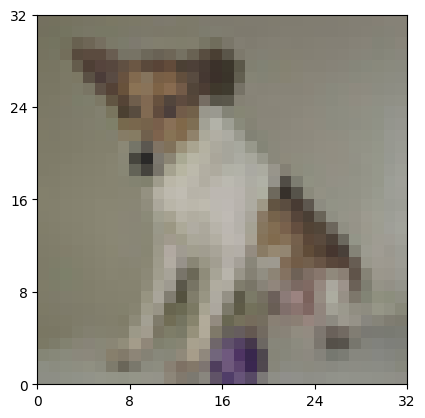

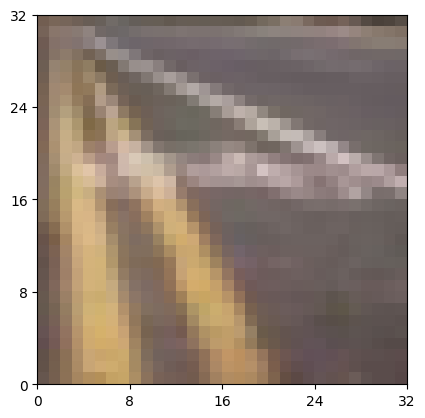

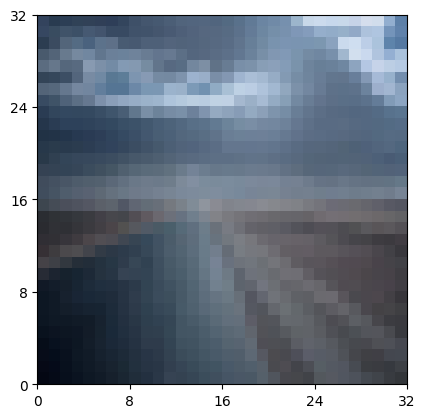

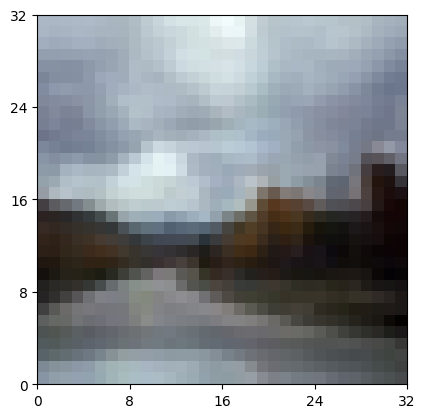

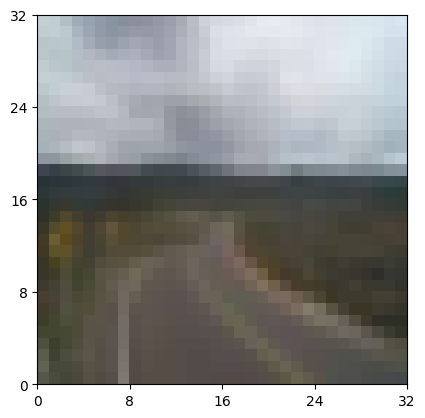

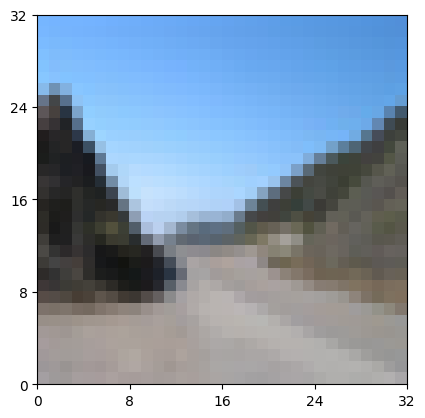

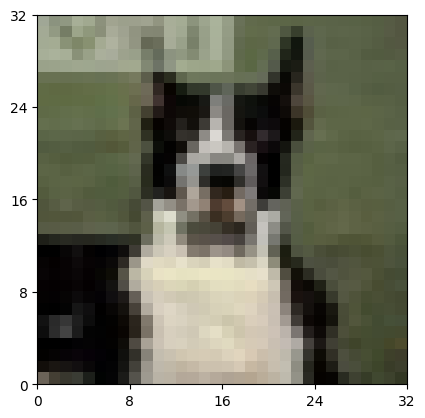

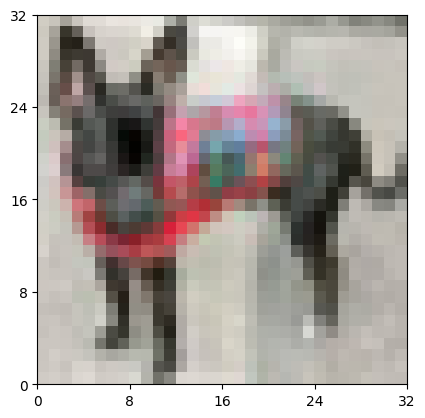

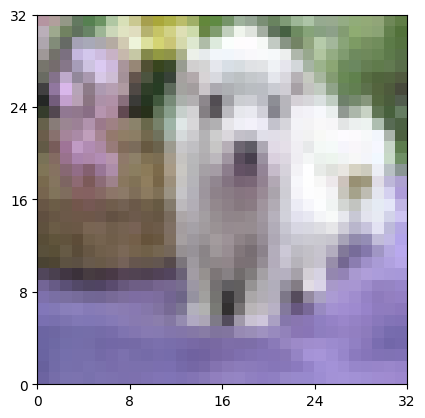

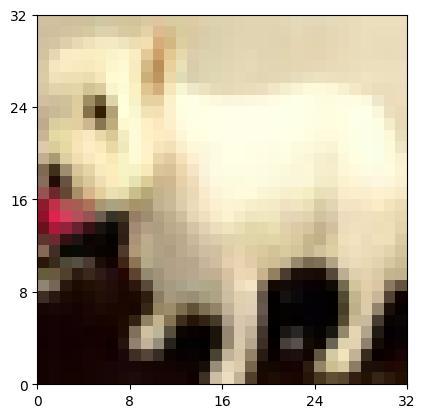

In [36]:
def plot_one_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  import matplotlib.pyplot as plt
  my_img   = data[img_idx, :].squeeze().reshape([32,32,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  fig, ax = plt.subplots(1,1)

  img = ax.imshow(my_img.astype('uint8'), extent=[-1,1,-1,1])

  x_label_list = [0, 8, 16, 24, 32]
  y_label_list = [0, 8, 16, 24, 32]

  ax.set_xticks([-1, -0.5, 0, 0.5, 1])
  ax.set_yticks([-1, -0.5, 0, 0.5, 1])

  ax.set_xticklabels(x_label_list)
  ax.set_yticklabels(y_label_list)

  fig.show(img)

#True Positives
tp_count = 0
print ("TRUE POSITIVES")
i = 0
while tp_count < 4 and i < len(X_test):
  prediction = knn_model.predict([X_test[i]])[0]
  if prediction == y_test[i] and prediction == 'dog':
    plot_one_image(X_test, y_test, i)
    tp_count += 1
  i += 1

#False Positives
fp_count = 0
print ("FALSE POSITIVES")
i = 0
while fp_count < 4 and i < len(X_test):
  prediction = knn_model.predict([X_test[i]])[0]
  if prediction != y_test[i] and prediction == 'dog':
    plot_one_image(X_test, y_test, i)
    fp_count += 1
  i += 1

#True Negatives
tn_count = 0
print ("TRUE NEGATIVES")
i = 0
while tn_count < 4 and i < len(X_test):
  prediction = knn_model.predict([X_test[i]])[0]
  if prediction == y_test[i] and prediction == 'road':
    plot_one_image(X_test, y_test, i)
    tn_count += 1
  i += 1


#False Negatives
fn_count = 0
print ("FALSE NEGATIVES")
i = 0
while fn_count < 4 and i < len(X_test):
  prediction = knn_model.predict([X_test[i]])[0]
  if prediction != y_test[i] and prediction == 'road':
    plot_one_image(X_test, y_test, i)
    fn_count += 1
  i += 1

In [37]:
# Create and train our multi layer perceptron model
nnet = MLPClassifier(hidden_layer_sizes=(3), random_state=1, max_iter=10000000)  ## How many hidden layers? How many neurons does this have?
nnet.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = nnet.predict(X_test)

# Print the score on the testing data
print("MLP Testing Accuracy:")
print(accuracy_score(y_test, predictions)*100)

MLP Testing Accuracy:
47.083333333333336


In [38]:
# Create and train our multi layer perceptron model
nnet = MLPClassifier(hidden_layer_sizes=(10, 5, 4), random_state=1, max_iter= 10000)  ## How many hidden layers? How many neurons does this have?
nnet.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = nnet.predict(X_test)

# Print the score on the testing data
print("MLP Testing Accuracy:")
print(accuracy_score(y_test, predictions)*100)

MLP Testing Accuracy:
86.66666666666667


In [39]:
for ilayer in [(1,1), (3,3), (5,5), (8,6), (10,10,10), (10,10,5)]:

  print('Layer params are ...')
  print(ilayer)
  nnet = MLPClassifier(hidden_layer_sizes=ilayer, random_state=1, max_iter=100)  ## How many hidden layers? How many neurons does this have?

  nnet.fit(X_train, y_train)

  # Predict what the classes are based on the testing data
  predictions = nnet.predict(X_test)

  # Print the score on the testing data
  print("MLP Testing Accuracy:")
  print(accuracy_score(y_test, predictions)*100)

Layer params are ...
(1, 1)
MLP Testing Accuracy:
47.083333333333336
Layer params are ...
(3, 3)
MLP Testing Accuracy:
47.083333333333336
Layer params are ...
(5, 5)
MLP Testing Accuracy:
52.916666666666664
Layer params are ...
(8, 6)
MLP Testing Accuracy:
44.166666666666664
Layer params are ...
(10, 10, 10)
MLP Testing Accuracy:
52.916666666666664
Layer params are ...
(10, 10, 5)
MLP Testing Accuracy:
90.41666666666667


In [40]:
# convert our data to floats for our CNN
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Create and train our CNN model
cnn = CNNClassifier(num_epochs=40)

cnn.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = cnn.predict(X_test)

# Print the score on the testing data
print("CNN Testing Set Score:")
print(accuracy_score(y_test, predictions)*100)

Epoch 1/40


<ipython-input-25-ba1c7b6d60e6>:110: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)


96/96 - 2s - loss: 1.6175 - accuracy: 0.5906 - 2s/epoch - 17ms/step
Epoch 2/40
96/96 - 0s - loss: 0.4618 - accuracy: 0.7990 - 429ms/epoch - 4ms/step
Epoch 3/40
96/96 - 0s - loss: 0.3560 - accuracy: 0.8479 - 407ms/epoch - 4ms/step
Epoch 4/40
96/96 - 0s - loss: 0.2823 - accuracy: 0.8833 - 415ms/epoch - 4ms/step
Epoch 5/40
96/96 - 0s - loss: 0.2227 - accuracy: 0.9115 - 414ms/epoch - 4ms/step
Epoch 6/40
96/96 - 0s - loss: 0.2107 - accuracy: 0.9229 - 418ms/epoch - 4ms/step
Epoch 7/40
96/96 - 0s - loss: 0.1819 - accuracy: 0.9292 - 412ms/epoch - 4ms/step
Epoch 8/40
96/96 - 0s - loss: 0.1685 - accuracy: 0.9365 - 404ms/epoch - 4ms/step
Epoch 9/40
96/96 - 0s - loss: 0.1811 - accuracy: 0.9302 - 420ms/epoch - 4ms/step
Epoch 10/40
96/96 - 0s - loss: 0.1556 - accuracy: 0.9406 - 394ms/epoch - 4ms/step
Epoch 11/40
96/96 - 0s - loss: 0.1286 - accuracy: 0.9479 - 409ms/epoch - 4ms/step
Epoch 12/40
96/96 - 0s - loss: 0.1541 - accuracy: 0.9490 - 420ms/epoch - 4ms/step
Epoch 13/40
96/96 - 0s - loss: 0.1397 

Epoch 1/80


<ipython-input-25-ba1c7b6d60e6>:110: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)


96/96 - 2s - loss: 2.4645 - accuracy: 0.6219 - val_loss: 0.3214 - val_accuracy: 0.8542 - 2s/epoch - 19ms/step
Epoch 2/80
96/96 - 1s - loss: 0.6576 - accuracy: 0.7646 - val_loss: 0.2983 - val_accuracy: 0.8750 - 594ms/epoch - 6ms/step
Epoch 3/80
96/96 - 1s - loss: 0.4114 - accuracy: 0.8479 - val_loss: 0.2333 - val_accuracy: 0.9083 - 654ms/epoch - 7ms/step
Epoch 4/80
96/96 - 1s - loss: 0.3489 - accuracy: 0.8635 - val_loss: 0.2094 - val_accuracy: 0.9375 - 731ms/epoch - 8ms/step
Epoch 5/80
96/96 - 1s - loss: 0.2857 - accuracy: 0.8927 - val_loss: 0.3562 - val_accuracy: 0.8500 - 606ms/epoch - 6ms/step
Epoch 6/80
96/96 - 0s - loss: 0.2947 - accuracy: 0.8917 - val_loss: 0.1953 - val_accuracy: 0.9375 - 487ms/epoch - 5ms/step
Epoch 7/80
96/96 - 0s - loss: 0.2134 - accuracy: 0.9062 - val_loss: 0.2133 - val_accuracy: 0.9250 - 493ms/epoch - 5ms/step
Epoch 8/80
96/96 - 0s - loss: 0.2392 - accuracy: 0.9094 - val_loss: 0.1401 - val_accuracy: 0.9458 - 486ms/epoch - 5ms/step
Epoch 9/80
96/96 - 0s - loss:

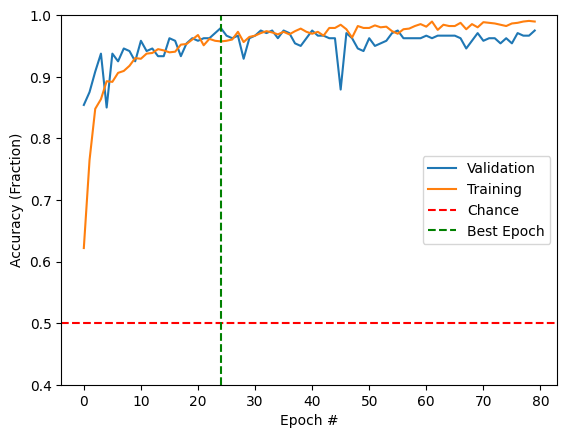

In [41]:
cnn = CNNClassifier(num_epochs=80)

history = cnn.fit(X_train, categorical_to_numpy(y_train), validation_data=(X_test, categorical_to_numpy(y_test)))

plot_acc(history)

(3072,)
[144. 144. 148. ... 207. 173. 142.]


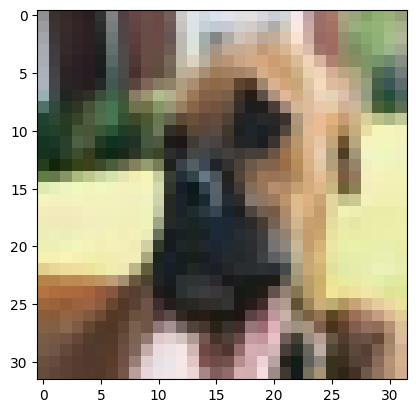

Classification:
1/1 [==============================] - 0s 179ms/step
[0]


In [42]:
image_index = 70 #pick any image you'd like
input_image = X_test[image_index]
print (input_image.shape)
print (input_image) #How many numbers are there? What does each represent?

plt.imshow(input_image.reshape(32,32,3).astype(int))
plt.show()

print ('Classification:')
print(cnn.predict(np.array([input_image]))) #Our predict function expects a 2D array.
#0 means dog, 1 means road

In [43]:
#Warning: expect a large output!
for layer_weights in history.model.weights:
  print (layer_weights)

<tf.Variable 'conv2d_21/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[ 0.01286046, -0.02754589, -0.07111195, -0.00746896,
          -0.13993475, -0.06143529, -0.01720658,  0.05830887,
          -0.06727459,  0.06023446,  0.03565825,  0.01737245,
           0.02162099,  0.0586021 , -0.11502245, -0.1256462 ,
          -0.12030057, -0.1225109 ,  0.04246881, -0.12057789,
           0.00249462,  0.05794858, -0.10440737, -0.07271608,
          -0.01639551, -0.11631691, -0.01122392, -0.08644856,
           0.03904001, -0.11937597,  0.13155119,  0.00855477],
         [-0.11218945,  0.08721332, -0.07733672,  0.01786535,
           0.02562576,  0.10623197, -0.00318638,  0.04648225,
           0.08222756,  0.05612128,  0.06046403, -0.00561181,
           0.04074937,  0.02364343, -0.10436433,  0.08245687,
           0.11676722, -0.12699595, -0.03311434, -0.03266076,
           0.09552139,  0.10114743,  0.13753162,  0.03717849,
          -0.13232687,  0.05923898,  0.12681216,  0.018

In [44]:
pred = cnn.predict_proba(np.array([input_image])) #What does each number mean?
print (pred)
dog_prob = pred[0][0] #This is the probability we'll use (if we know dog prob, we know the classification)

print ('Probability of dog:')
print (dog_prob)

1/1 [==============================] - 0s 19ms/step
[[1.000000e+00 8.365161e-10]]
Probability of dog:
1.0


In [45]:

saliencies = [] #eventually, will be the same size as input_image
all_changed_pixels = []
pixel_differences = []
for index, pixel in enumerate(input_image):
  #index counts up from 0, pixel is between 0 and 255
  if index%100 == 0: #will track progress - this might take a while
    print (index)
  # if index>500:
  #   break
  changed_input = input_image.copy() #make sure not to change the original input_image!

  # A much faster approach would be vectorize - create an array with all the changed
  #versions so that we can feed them all into the CNN at the same time.
  D_list = []
  changed_versions_of_pixel = []

  for pixel_change in [-50, -30, -10, 10, 30, 50]:
    changed_pixel = pixel + pixel_change

    if 0 <= changed_pixel <= 255:
      #add all the changed pixels to a list
      changed_versions_of_pixel.append(changed_pixel)
      pixel_differences.append(pixel- changed_pixel)

  # add the list of changed pixels to another list
  all_changed_pixels.append(changed_versions_of_pixel)

# make a 'stack' of all images with their changed pixel in each by using the
#changed input as the template and then reverting it back to the original when
# we move to the next pixel
changed_images = []

for j in range(len(changed_input)):
    for i in range(len(all_changed_pixels[j])):
      changed_input[j]= all_changed_pixels[j][i]
      changed_images.append(changed_input)
      changed_input = input_image.copy()

a = cnn.predict_proba(np.array([input_image]))
b = cnn.predict_proba(np.array(changed_images))

dog_prob = a[0][0]
new_b = []
for i in b:
  new_b.append(i[0])
new_b = np.array(new_b)
probability_changes = new_b - dog_prob

d_total = abs(probability_changes/pixel_differences)
# the d_total list is all the values of D for each pixel with it's changes, it
# needs to be averaged, but because we ommitted some changed values that were not
# in the 0-255 range, use 'start' to 'end' to splice the array.

start = 0
end = 0
for i in all_changed_pixels:
  end += len(i)
  saliency = (np.mean(d_total[start:end]))
  start = end
  saliencies.append(saliency)

print (saliencies)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
525/525 [==============================] - 1s 2ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [46]:
sal_array = np.array(saliencies)
print (sal_array.min(), sal_array.max())
print (sal_array.shape)

0.0 0.0
(3072,)


In [47]:
print (sal_array.min(), sal_array.max())

sal_array = (sal_array - sal_array.min())/(sal_array.max()-sal_array.min())
print (sal_array.min(), sal_array.max())

sal_array.shape

0.0 0.0
nan nan


<ipython-input-47-af897e376a8d>:3: RuntimeWarning: invalid value encountered in true_divide
  sal_array = (sal_array - sal_array.min())/(sal_array.max()-sal_array.min())


(3072,)

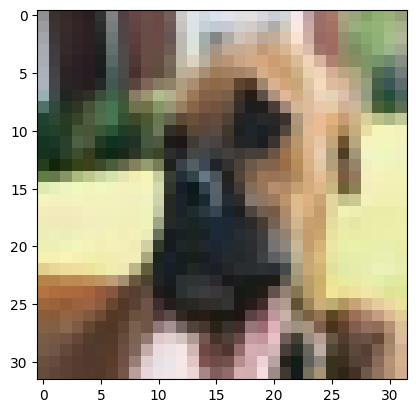

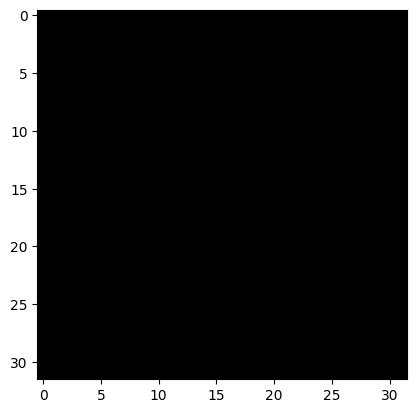

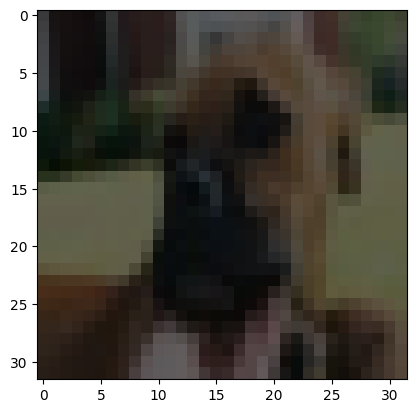

In [48]:
#Plot our original image
plt.imshow(input_image.reshape(32,32,3).astype(int))
plt.show()

#Plot our saliency map: the brighter, the higher the saliency
plt.imshow(sal_array.reshape(32,32,3))
plt.show()

#Plot our saliency map superimposed on the image
plt.imshow(input_image.reshape(32,32,3).astype(int))
plt.imshow(sal_array.reshape(32,32,3),alpha=0.6)
plt.show()